In [1]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("train_HK6lq50.csv")
df_test = pd.read_csv("test_2nAIblo.csv")

In [2]:
df_test["is_pass"] = 0
df = pd.concat([df_train,df_test], ignore_index = True)

In [3]:
df["age"].fillna(df["age"].median(), inplace=True)
df["trainee_engagement_rating"].fillna(df["trainee_engagement_rating"].mode(), inplace = True)

In [30]:
df_new = pd.get_dummies(df, columns = ['test_type','is_handicapped','gender'] )
ordered_education = ['No Qualification','Matriculation','High School Diploma','Bachelors','Masters']
df_new['education'] = df_new['education'].astype("category",ordered=True,categories=ordered_education).cat.codes
ordered_diff = ['easy','intermediate','hard','vary hard']
df_new['difficulty_level'] = df_new['difficulty_level'].astype("category",ordered=True,categories=ordered_diff).cat.codes
df_new = pd.get_dummies(df_new, columns = ['program_type'])
df_new['duration_per_program'] = df_new['program_duration']/df_new['total_programs_enrolled']
df_new['education'] = df_new['education']+1
df_new['age_by_edu'] = df_new['age']/df_new['education']
df_new['ter_by_diff'] = (df_new['trainee_engagement_rating']*10)/(df_new['difficulty_level']+1) #new
df_new['log_duration'] = np.log(df_new['program_duration'])
df_new['log_age'] = np.log(df_new['age'])
df_new['log_dpp'] = np.log(df_new['duration_per_program'])
df_new.drop(columns = ['id','program_id','trainee_id','test_id'] , inplace = True)

c:\users\nitesh gowda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nitesh gowda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [31]:
df_new.describe()

,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,test_type_offline,test_type_online,...,program_type_V,program_type_X,program_type_Y,program_type_Z,duration_per_program,age_by_edu,ter_by_diff,log_duration,log_age,log_dpp
count,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104388.000000,104496.000000,104496.000000,104496.000000,...,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104496.000000,104388.000000,104496.000000,104496.000000,104496.000000
mean,128.209386,0.650781,2.800873,2.248478,37.431835,2.586223,2.397776,0.486784,0.595774,0.404226,...,0.177940,0.045246,0.309141,0.089353,60.223441,14.317621,17.533553,4.852202,3.601880,4.001029
std,6.892792,0.825037,0.731030,1.011789,7.236719,1.238415,1.327130,0.499828,0.490744,0.490744,...,0.382464,0.207844,0.462142,0.285254,27.476597,4.878381,12.487441,0.054250,0.208815,0.444093
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.714286,4.250000,2.500000,4.762174,2.833213,2.164964
25%,121.000000,0.000000,2.000000,1.000000,30.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,40.000000,10.666667,10.000000,4.795791,3.401197,3.688879
50%,131.000000,0.000000,3.000000,2.000000,39.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,60.500000,13.000000,10.000000,4.875197,3.663562,4.102643
75%,134.000000,1.000000,3.000000,3.000000,43.000000,3.000000,4.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,67.000000,19.500000,20.000000,4.897840,3.761200,4.204693
max,136.000000,3.000000,5.000000,4.000000,63.000000,14.000000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,136.000000,50.000000,50.000000,4.912655,4.143135,4.912655


In [32]:
df1 = df_new[:73147]
df2 = df_new[73147:]

In [33]:
#X_train =df1.drop('is_pass', axis =1).values
#Y_train = df1['is_pass'].values
X_test = df2.drop(['is_pass'] ,axis =1)
#for features importance
X_train = df1.drop(['is_pass'] , axis =1)
Y_train = df1['is_pass']

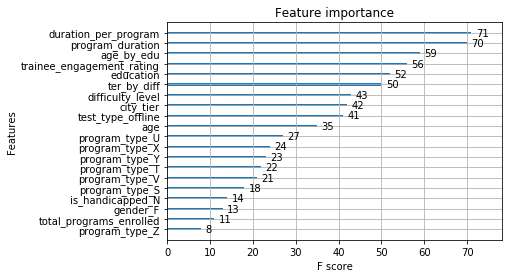

In [34]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
seed = 7
test_size = 0.33
model = XGBRegressor()
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=test_size, random_state=seed)
#eval_set = [(X_test1,y_test1)]
#model.fit(X_train1, y_train1, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

#y_pred = model.predict(X_test1)
model.fit(X_train,Y_train)
#accuracy = roc_auc_score(y_test1, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_importance(model)
pyplot.show()

In [35]:
df_new.columns

Index(['program_duration', 'difficulty_level', 'education', 'city_tier', 'age',
       'total_programs_enrolled', 'trainee_engagement_rating', 'is_pass',
       'test_type_offline', 'test_type_online', 'is_handicapped_N',
       'is_handicapped_Y', 'gender_F', 'gender_M', 'program_type_S',
       'program_type_T', 'program_type_U', 'program_type_V', 'program_type_X',
       'program_type_Y', 'program_type_Z', 'duration_per_program',
       'age_by_edu', 'ter_by_diff', 'log_duration', 'log_age', 'log_dpp'],
      dtype='object')

In [23]:
df_new.drop(columns = ['log_age','log_duration','log_dpp'] , inplace = True)

In [36]:
df1 = df_new[:73147]
df2 = df_new[73147:]
X_train =df1.drop('is_pass', axis =1).values
Y_train = df1['is_pass'].values
X_test = df2.drop('is_pass', axis =1)
#for features importance
#X_train = df1.drop('is_pass', axis =1)
#Y_train = df1['is_pass']

In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01], #so called `eta` value
              'max_depth': [8,10,12],
              'min_child_weight': [1,2,3],
              'silent': [0],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,parameters,cv = 2,n_jobs = 5,verbose=True)

xgb_grid.fit(X_train,Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 20.7min finished


0.14991420475013525
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 0, 'subsample': 0.7}


In [41]:
y_pred = xgb_grid.predict(X_test.as_matrix())
df3 = pd.read_csv('sample_submission_vaSxamm.csv')
df3['is_pass'] = y_pred
df3.to_csv('Submission.csv')